# creating the game_library dataframe

In [17]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
game_library = pd.read_json("game_library.json")

In [ ]:
#game_library.shape

#  Pre-Explore Part 1 (just looking at the data)

### the dataframe

In [ ]:
game_library.head()

In [ ]:
# Genre 

### What genre are most common in this dataset ?

In [13]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
game_library.genres.value_counts()

In [ ]:
to_1D(game_library["genres"])


In [ ]:
to_1D(game_library["genres"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["genres"]).value_counts().iloc[:4].index,
        to_1D(game_library["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)



In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

In [ ]:
#sns.countplot(x='genres', data=game_library)b

### What themes are most common in this dataset 

In [ ]:
to_1D(game_library["themes"])

In [ ]:
to_1D(game_library["themes"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (16,4))
ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
        to_1D(game_library["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

In [ ]:
game_library.head(3)

In [ ]:
pd.set_option('display.max_columns', None)
game_library.head(3)

In [ ]:
game_library.themes.value_counts()

###   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

### In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

In [ ]:
game_library.version_title.value_counts()

### What are the most common platforms ?

In [ ]:
game_library.platforms.value_counts()

In [ ]:
to_1D(game_library["platforms"])

In [ ]:
to_1D(game_library["platforms"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:
game_library.head()

In [ ]:
to_1D(game_library["rating"])

In [ ]:
game_library.rating.value_counts()

In [ ]:
game_library.rating_count.value_counts()

In [ ]:
game_library.total_rating.value_counts()

In [ ]:
game_library.shape

In [ ]:
#game_library.info()

## Splitting the data (from data with ratings and non-ratings)

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [ ]:
#this is the dataframe that ONLY has ratings 
df2 = game_library[game_library['rating'].notnull()]
df2


In [ ]:
#this is a dataframe with no ratings 
df3= game_library[game_library['rating'].isnull()]

In [ ]:
pd.set_option('display.max_columns', None)
df3.head()

> dont forget to bin the data from the diffrent ratings 

In [ ]:
df2['rating_bin'] = pd.cut(df2.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


In [ ]:
#df2.head()

In [ ]:
#creating the json for the data that HAS ratings 
#df2.to_json("explore_game_library.json")

In [ ]:
pd.set_option('display.max_columns', 500)
df2.head()

# Exploration 

In [14]:
df2 = pd.read_json("explore_game_library.json")

In [ ]:
pd.set_option('display.max_columns', 500)

df2.head()

In [ ]:
#this is for tablaue 
#df2 = pd.read_csv("explore_game_library.csv")

In [ ]:
#df2

In [ ]:
df2.info()

In [ ]:
df2.isnull().sum()

In [ ]:
df2 = df2.drop(columns=['ports','expansions','expanded_games','remasters','standalone_expansions','version_description','title_version','second_id'])

- these are collumns that where dropped for me, I dont think these are needed 
'ports',
'expansions',
'expanded_games',
'remasters','
standalone_expansions',
'version_description',
'title_version',
'second_id'

In [ ]:
df2.info()                 

In [ ]:
status
storyline
version_title
version_parent
forks
second 

In [ ]:
df2 = df2.drop(columns=['status','storyline','version_title','version_parent','forks','second'])

In [ ]:
df2.info()

In [ ]:
df2 = df2.drop(columns= 'remakes')

In [ ]:
df2.info()

In [ ]:
# 24  alternative_names        83906 non-null   object        
#  25  artworks                 89968 non-null   object        
#  26  game_engines             51633 non-null   object        
#  27  keywords                 138083 non-null  object        
#  28  status                   7688 non-null    float64   

In [ ]:
#calling the prepared datafram
#df2.to_json("explore_game.json")

In [2]:
df2 = pd.read_json("explore_game.json")

In [49]:
df2.rating_bin.value_counts()

good            58053
alright         40702
great           24885
fair            16162
average         11413
unimpressive     4041
subperb          1624
bad              1588
very_bad          176
Name: rating_bin, dtype: int64

In [15]:
def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df2.rating_bin)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.rating_bin)

    return train, validate, test


In [42]:
train, validate, test = train_validate_test_split(df2)

train.shape, validate.shape, test.shape

((88840, 72), (38075, 72), (31729, 72))

In [43]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])



## (more complicated Questions)

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

Text(0.5, 1.0, 'platforms')

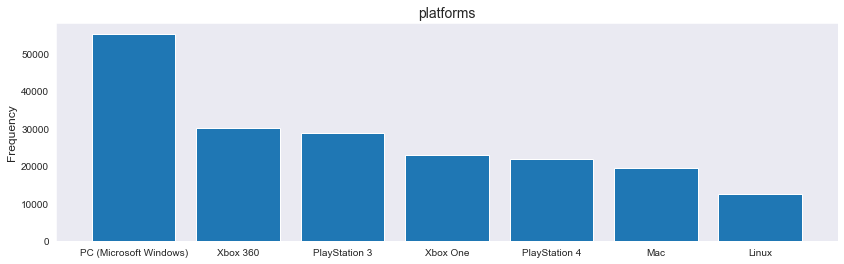

In [97]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
        to_1D(train["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:
sns.countplot(x='rating', data=train, order=train.rating.value_counts().iloc[:5].index)

In [ ]:
sns.countplot(x='rating_bin', data=train, order=train.rating_bin.value_counts().iloc[:9].index)

## Exploring `good rating`

In [ ]:
df_good_rating = train[train['rating_bin']== 'good']
df_good_rating.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [24]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",...,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",...,False,0,False,NaN,False,None,0,0,0,subperb


> ### Most frequent platforms in the raiting `subperb`

Text(0.5, 1.0, 'platforms')

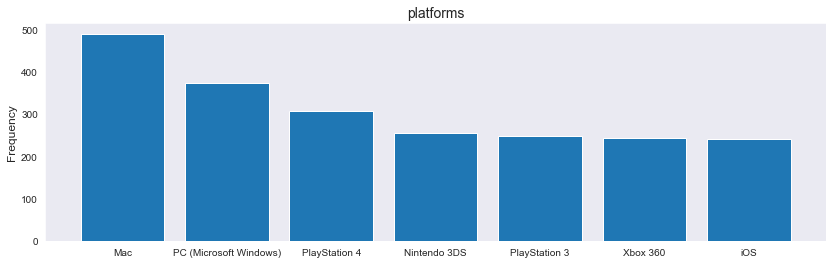

In [98]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [ ]:
df_great_rating = train[train['rating_bin']== 'great']
df_great_rating.head(3)

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:

df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
df_top3_rating.head(1)

## These are the top 7 platforms for the three best ratings (good, great, subperb)

Text(0.5, 1.0, 'Superb platforms')

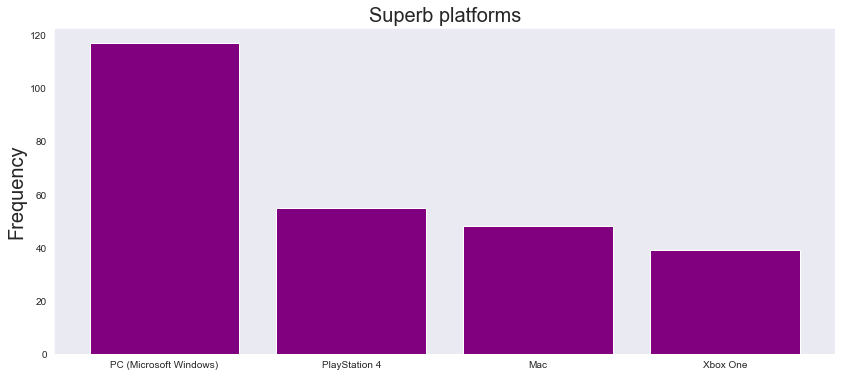

In [128]:
fig, ax = plt.subplots(figsize = (14,6))

ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values,
          color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Superb platforms", size = 20)

In [103]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index

Index(['Mac', 'PC (Microsoft Windows)', 'PlayStation 4', 'Nintendo 3DS'], dtype='object')

In [104]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values

array([490, 373, 306, 254])

In [129]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Mac', 'PC (Microsoft Windows)', 'PlayStation 4', 'Nintendo 3DS'],
    y=[490, 373, 306, 254],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Superb Platforms')

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - X-Box 360
    - ps 3 and 4 
    - X-box 1

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [59]:
df_low3_rating = df2[(df2['rating_bin']== 'bad') | (df2['rating_bin']== 'very_bad') | (df2['rating_bin']== 'awful')]
df_low3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1855,3854,0,2014-01-19,"[35445, 1744593, 1946817]",1.058400e+09,[racing],Charinko Hero,[Nintendo GameCube],[8811],"[96476, 103301, 105011, 109292, 111130, 113895...",charinko-hero,"Charinko Hero is a Racing game, developed and ...","[1, 268435466, 536871308]",2020-11-06,https://www.igdb.com/games/charinko-hero,c9e8c906-4031-9530-70c2-6f4d85546065,None,4078.0,[10014],None,"[single-player, split-screen]",[Third person],[Action],None,[32596],None,None,[396],NaN,None,16.0,0,None,16.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad


Text(0.5, 1.0, 'platforms')

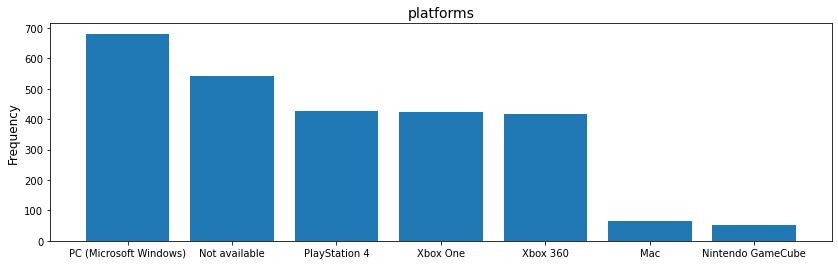

In [67]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [33]:
df_subperb_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",...,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",...,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 20914, 209...","[16, 21, 41, 43, 533, 571, 960, 1020, 1985, 2031]",...,False,0,False,NaN,False,None,0,0,0,subperb
350022,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349937,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
388383,6440,0,2014-04-25 09:48:13,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",...,False,0,True,37.0,False,ed1ef7e9-f817-f949-00bb-9fbc9a1f2b07,0,4,0,subperb
350134,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
420836,25358,0,2016-11-01 09:07:23,"[14912, 76955]",9.616320e+08,"[shooter, role-playing-rpg, adventure]",Deus Ex: Game of the Year Edition,[PC (Microsoft Windows)],[66779],"[25311, 55038, 76877, 96217, 103301, 105049, 1...",...,False,0,False,NaN,False,None,0,0,0,subperb


In [34]:
pd.set_option('display.max_columns', 500)
df_subperb_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",2022-07-11 11:30:50,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],None,None,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36,After fighting a losing battle with the raging...,92.221300,36,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,None,None,NaN,NaN,[7365],None,[86493],None,None,None,None,None,NaN,None,None,7365.0,False,False,False,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",gothic-ii-gold-edition,Gothic II: Gold Edition brings together the ex...,"[1, 17, 38, 268435468]",2022-09-25 09:56:26,https://www.igdb.com/games/gothic-ii-gold-edition,0b0d512e-1add-c724-d6a5-f69e9043c619,[27942],81332.0,"[47901, 99186]","[102680, 102681, 102682, 102683, 102684]",[single-player],[Third person],"[Action, Fantasy, Open world]","[26765, 26766, 118909, 140843]",None,[55855],[134],None,NaN,None,90.003422,5,None,90.003422,5,2262.0,Gold Edition,NaN,463.0,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",la-noire,L.A. Noire for PlayStation 4 and Xbox One deli...,"[1, 20, 22, 33, 38, 39, 43, 268435461, 2684354...",2022-09-22 13:55:14,https://www.igdb.com/games/la-noire,1db7b5e1-bc8b-cc45-e4b5-2f7b15aa5cf2,"[61480, 62001, 93238]",120996.0,[54124],"[141184, 141185, 141186, 141187, 146355]",[single-player],[Third person],"[Action, Thriller, Historical, Sandbox, Open w...",[56427],"[60591, 103643]","[46639, 46640]",None,"[1323, 1669, 4076, 4357, 16826, 16828, 16894, ...",NaN,"[16469, 16484]",92.990746,23,None,83.162040,29,NaN,None,1.0,NaN,None,15.0,73.333333,6.0,None,None,109.0,NaN,None,None,None,None,None,None,None,None,341.0,"At 9.45 in the morning, a thunderous explosio...","DLC: ""Nicholson Electroplating"" Arson Case",NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 2091

Text(0.5, 1.0, 'Most common Genre in Superb Games')

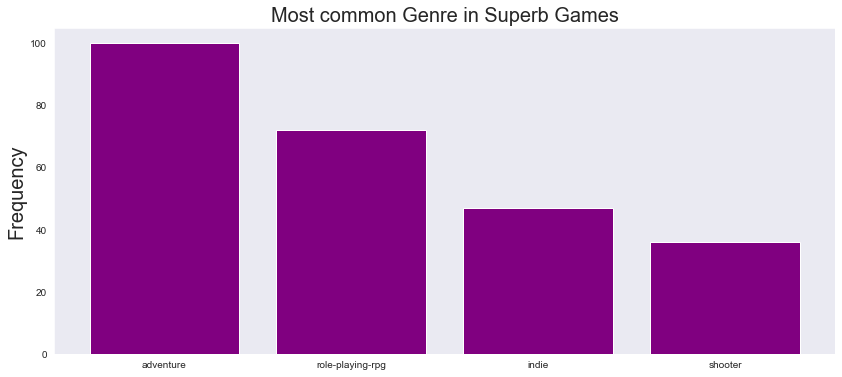

In [130]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

In [87]:
df_subperb_rating["genres"].value_counts().iloc[:4].index

Index([                  ['role-playing-rpg', 'adventure'],
                        ['shooter', 'racing', 'adventure'],
       ['real-time-strategy-rts', 'simulator', 'strategy'],
                                      ['role-playing-rpg']],
      dtype='object')

In [89]:
df_subperb_rating["genres"].value_counts().iloc[:4].values

array([285, 226, 218,  11])

In [94]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['role-playing-rpg & adventure', 'shooter , racing , adventure','real-time-strategy-rts , simulator , strategy', 'role-playing-rpg'],
    y=[285, 226, 218,  11],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Superb Genre Combintaion')

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

Text(0.5, 1.0, 'platforms')

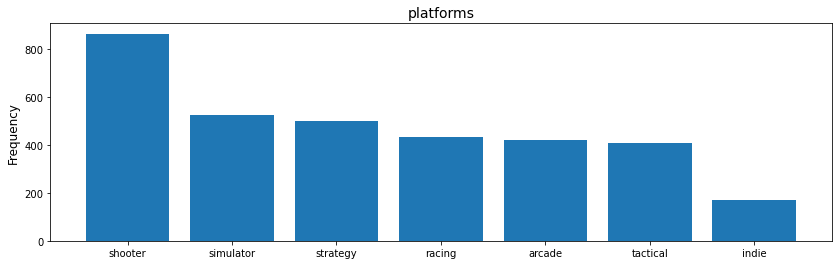

In [61]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [58]:
df_low2_rating = df2[(df2['rating_bin']== 'very_bad') | (df2['rating_bin']== 'awful')]
df_low2_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1855,3854,0,2014-01-19,"[35445, 1744593, 1946817]",1.058400e+09,[racing],Charinko Hero,[Nintendo GameCube],[8811],"[96476, 103301, 105011, 109292, 111130, 113895...",charinko-hero,"Charinko Hero is a Racing game, developed and ...","[1, 268435466, 536871308]",2020-11-06,https://www.igdb.com/games/charinko-hero,c9e8c906-4031-9530-70c2-6f4d85546065,None,4078.0,[10014],None,"[single-player, split-screen]",[Third person],[Action],None,[32596],None,None,[396],NaN,None,16.0,0,None,16.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad
2270,88344,0,2018-02-21,"[224288, 240667, 1992847]",NaN,[Not available],Lola's ABC Party - Learn to Read,[Not available],None,None,lolas-abc-party-learn-to-read,None,None,2020-11-06,https://www.igdb.com/games/lolas-abc-party-lea...,07ee8340-7fd4-d10a-faf7-5ed2836cae44,None,NaN,None,None,[Not available],[Not available],[Not available],None,None,None,None,None,NaN,None,20.0,0,None,20.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad
3142,90820,0,2018-03-13,"[287523, 1994803]",NaN,[Not available],Minimonsters Crush,[Not available],None,None,minimonsters-crush,None,None,2020-11-06,https://www.igdb.com/games/minimonsters-crush,9d2a81dc-4846-0bdb-a115-c95551febecd,None,NaN,None,None,[Not available],[Not available],[Not available],None,None,None,None,None,NaN,None,20.0,0,None,20.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad
3252,95527,0,2018-03-24,"[340180, 1967131]",NaN,[Not available],Vuzzl - Create Animated Jigsaw Puzzles,[Not available],None,None,vuzzl-create-animated-jigsaw-puzzles,None,None,2020-11-06,https://www.igdb.com/games/vuzzl-create-animat...,bc0d790d-c817-1a23-bdda-8f102daa1843,None,NaN,None,None,[Not available],[Not available],[Not available],None,None,None,None,None,NaN,None,20.0,0,None,20.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad
4490,92092,0,2018-03-16,"[316488, 1947110]",NaN,[Not available],Funtoon's World HD,[Not available],None,None,funtoons-world-hd,None,None,2020-11-06,https://www.igdb.com/games/funtoons-world-hd,6484c567-e288-985d-95ba-e692eb63b50f,None,NaN,None,None,[Not available],[Not available],[Not available],None,None,None,None,None,NaN,None,20.0,0,None,20.0,0,NaN,None,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,very_bad


Text(0.5, 1.0, 'platforms')

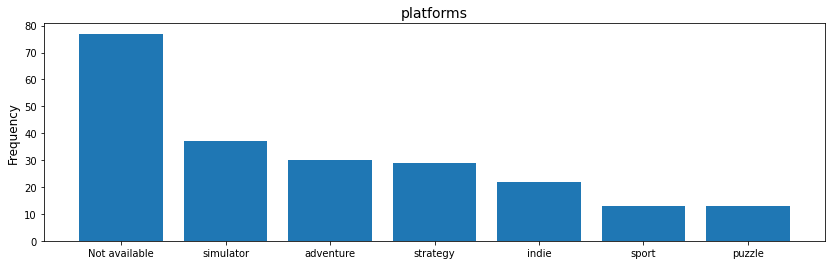

In [60]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low2_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low2_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

### Q 2.2 what about the three lowest ratings (awful) ? what is the overall most highest genre in these low rating games?

In [62]:
df_awful_rating = train[train['rating_bin']== 'awful']
df_awful_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin


In [44]:
train.rating_bin.value_counts()

good            32509
alright         22793
great           13936
fair             9051
average          6391
unimpressive     2263
subperb           909
bad               889
very_bad           99
Name: rating_bin, dtype: int64

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

Text(0.5, 1.0, 'Most common themes in superb games')

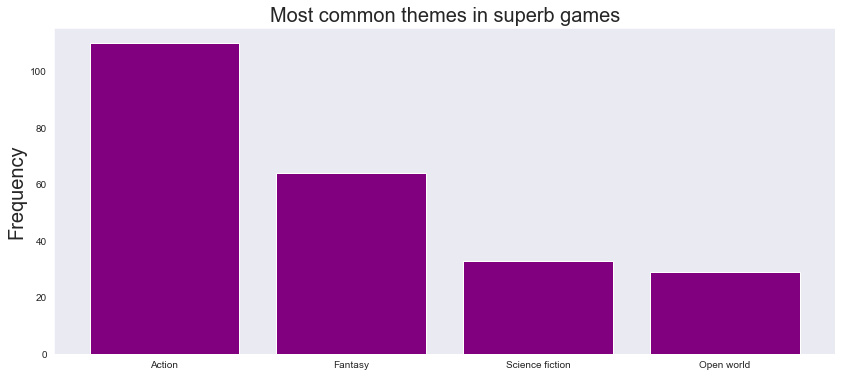

In [134]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].values,
           color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common themes in superb games", size = 20)

In [132]:
df_subperb_rating["themes"].value_counts().iloc[:4].index

Index([['Action', 'Science fiction'],             ['Not available'],
                          ['Action'],         ['Action', 'Fantasy']],
      dtype='object')

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

NameError: name 'df_top3_rating' is not defined

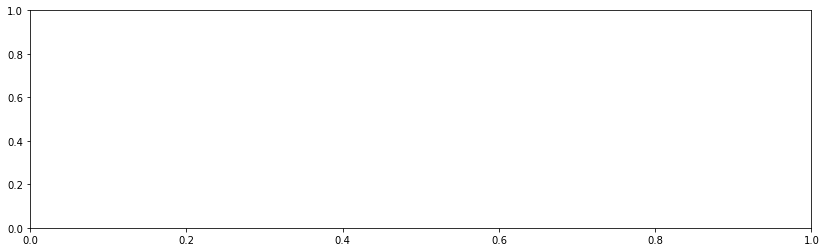

In [64]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

Text(0.5, 1.0, 'Themes')

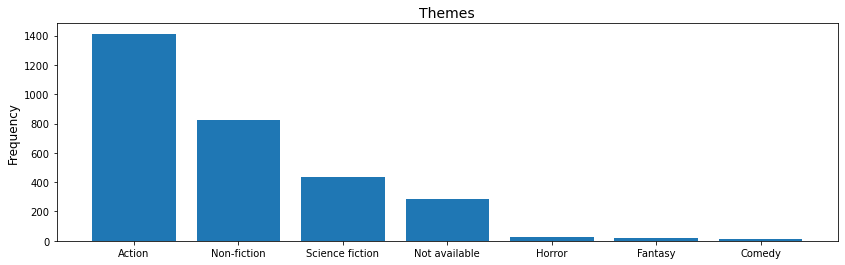

In [68]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

In [78]:
df_low3_rating["themes"].value_counts().iloc[:7].index

Index([    ['Action', 'Non-fiction'], ['Action', 'Science fiction'],
                   ['Not available'],                    ['Action'],
                ['Action', 'Horror'],           ['Science fiction'],
                     ['Non-fiction']],
      dtype='object')

In [79]:
df_low3_rating["themes"].value_counts().iloc[:7].values

array([819, 421, 283, 130,   9,   7,   7])

In [75]:
to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index

Index(['Action', 'Non-fiction', 'Science fiction', 'Not available', 'Horror',
       'Fantasy', 'Comedy'],
      dtype='object')

In [74]:
to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values

array([1413,  827,  438,  283,   24,   17,   11])

In [91]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Action & Non-fiction','Action & Science fiction','Action', 'Action & Horror','Science fiction','Non-fiction'],
    y=[819,  421,  130,  9,   7,   7],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [ ]:
df2.head(2)

>## Not online multi

In [ ]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [ ]:
train.onlinecoop.value_counts()

In [ ]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

In [ ]:
NOT_online_multi.head()

In [ ]:
NOT_online_multi.first_release_date.value_counts()

In [ ]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

In [ ]:
NOT_online_multi.head()

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [ ]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

## Not online multi-player that games are after 1981

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [ ]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

## Games that are after 1981 - Ratings 

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

In [ ]:
train.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["game_modes"]).value_counts().iloc[:7].index,
        to_1D(train["game_modes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- looks liek most common games are single and multi player, and co op 

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

- didnt find anything important

In [ ]:
train.head(3)

# Question - What are the top 5 most highest member rated videogames?

In [107]:
super_high_rating = df_subperb_rating[df_subperb_rating['rating'] > 99]



In [109]:
super_high_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
238245,14173,1,2015-10-22 20:27:31,None,1.072829e+09,[turn-based-strategy-tbs],Heroes of Might and Magic III: Horn of the Abyss,[PC (Microsoft Windows)],[197137],"[7615, 9472, 13196, 93694, 99118, 106104, 1111...",heroes-of-might-and-magic-iii-horn-of-the-abyss,Heroes of Might and Magic III: Horn of the Aby...,"[17, 268435472, 536871946, 536872059, 53687246...",2022-08-10 06:34:00,https://www.igdb.com/games/heroes-of-might-and...,75e4c77f-8b08-6cb7-90a6-6eb8dd908495,None,12745.0,[99879],None,"[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[5046, 5047]",[49693],None,None,"[1034, 1147, 1549, 2004]",NaN,None,99.264183,13,None,99.264183,13,NaN,None,3.0,194.0,[458],5.0,NaN,NaN,None,None,366.0,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
352643,138851,12,2020-09-15 01:13:40,[1998974],1.298938e+09,[music],Not In The Groove,[PC (Microsoft Windows)],[210626],"[31496, 63933, 77720, 84922, 86847, 87150, 110...",not-in-the-groove,"A rhythm game based on StepMania, In The Groov...","[268435463, 536871946, 536872476, 536872612, 5...",2022-01-14 23:10:25,https://www.igdb.com/games/not-in-the-groove,71fc1566-5699-0a21-35d8-9bfdfc44f68d,None,114716.0,None,None,"[single-player, multiplayer]",[Auditory],[Not available],[256486],"[49298, 56117]",None,None,"[1034, 1564, 1700, 12853, 20708]",NaN,None,99.033844,13,None,99.033844,13,NaN,None,1.0,NaN,None,10.0,NaN,NaN,None,None,144393.0,NaN,[11707],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
293733,72327,0,2017-09-30 00:54:38,"[73633, 119359, 1185935]",1.303344e+09,[hack-and-slash-beat-em-up],Streets of Rage Remake,[PC (Microsoft Windows)],[192346],"[1652, 1655, 3222, 14704, 21564, 22387, 27419,...",streets-of-rage-remake,Streets of Rage Remake is a fangame reboot on ...,"[1, 18, 268435481, 536870973, 536871029, 53687...",2022-08-12 18:32:15,https://www.igdb.com/games/streets-of-rage-remake,ac41a2ee-ef9b-afe5-5048-806bb775b597,None,130589.0,[95431],"[127037, 127038, 127039]","[single-player, multiplayer, co-operative]",[Not available],"[Action, Science fiction]",[137922],None,None,None,"[61, 117, 301, 939, 982, 1059, 1147, 1617, 200...",NaN,[34876],99.653129,8,None,99.653129,8,NaN,None,1.0,NaN,None,1.0,NaN,NaN,None,None,NaN,NaN,[14646],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
305852,122661,2,2019-09-30 18:02:49,None,1.569974e+09,[strategy],Gwent: Iron Judgment,[Xbox One],[176738],"[11407, 13196, 19404, 32510, 56967, 99118, 113...",gwent-iron-judgment,The North is on the rise and Radovid is back t...,"[17, 268435471, 536874083]",2022-06-26 15:17:40,https://www.igdb.com/games/gwent-iron-judgment,95911dcd-38ae-f9ce-631a-d4891df2f319,"[25968, 25969]",81851.0,[92867],"[361507, 361509, 361510, 361511, 361512, 361513]","[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[117340, 117341, 117342, 117343, 133387, 13338...",None,None,None,[3171],NaN,[30243],99.526142,6,None,99.526142,6,NaN,None,NaN,62.0,[452],1.0,NaN,NaN,None,None,19474.0,NaN,None,None,None,None,None,None,N

# What Are the most common player perspectives in 

In [32]:
df_subperb_rating.player_perspectives.value_counts()

[Third person]                                                          329
[Bird view / Isometric]                                                 247
[First person, Third person]                                            235
[Side view]                                                              31
[Not available]                                                          20
[First person]                                                           15
[Third person, Bird view / Isometric]                                     6
[Text]                                                                    5
[Bird view / Isometric, Text]                                             4
[Bird view / Isometric, Side view]                                        3
[First person, Text]                                                      2
[Bird view / Isometric, Auditory]                                         1
[Auditory]                                                                1
[Third perso

Text(0.5, 1.0, 'Most common Player Perspective in Superb Rated Games')

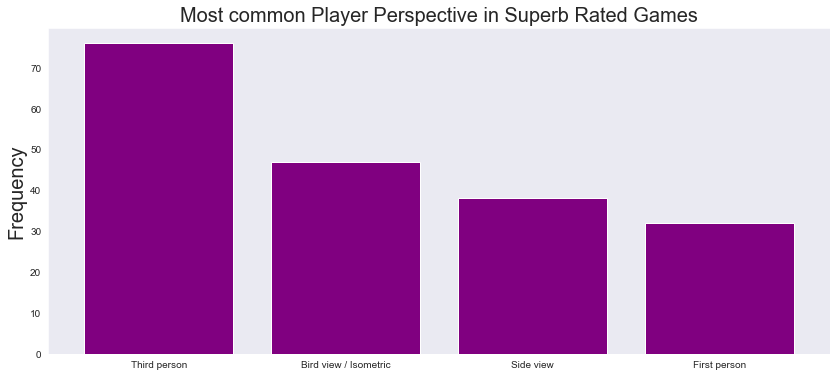

In [133]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Player Perspective in Superb Rated Games", size = 20)

- looks like the majority of the best games have third person and, bird view/isometric 

# what can i find more info on subperb ratings?

In [117]:
df_subperb_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",2022-07-11 11:30:50,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],None,None,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36,After fighting a losing battle with the raging...,92.221300,36,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,None,None,NaN,NaN,[7365],None,[86493],None,None,None,None,None,NaN,None,None,7365.0,False,False,False,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",gothic-ii-gold-edition,Gothic II: Gold Edition brings together the ex...,"[1, 17, 38, 268435468]",2022-09-25 09:56:26,https://www.igdb.com/games/gothic-ii-gold-edition,0b0d512e-1add-c724-d6a5-f69e9043c619,[27942],81332.0,"[47901, 99186]","[102680, 102681, 102682, 102683, 102684]",[single-player],[Third person],"[Action, Fantasy, Open world]","[26765, 26766, 118909, 140843]",None,[55855],[134],None,NaN,None,90.003422,5,None,90.003422,5,2262.0,Gold Edition,NaN,463.0,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",la-noire,L.A. Noire for PlayStation 4 and Xbox One deli...,"[1, 20, 22, 33, 38, 39, 43, 268435461, 2684354...",2022-09-22 13:55:14,https://www.igdb.com/games/la-noire,1db7b5e1-bc8b-cc45-e4b5-2f7b15aa5cf2,"[61480, 62001, 93238]",120996.0,[54124],"[141184, 141185, 141186, 141187, 146355]",[single-player],[Third person],"[Action, Thriller, Historical, Sandbox, Open w...",[56427],"[60591, 103643]","[46639, 46640]",None,"[1323, 1669, 4076, 4357, 16826, 16828, 16894, ...",NaN,"[16469, 16484]",92.990746,23,None,83.162040,29,NaN,None,1.0,NaN,None,15.0,73.333333,6.0,None,None,109.0,NaN,None,None,None,None,None,None,None,None,341.0,"At 9.45 in the morning, a thunderous explosio...","DLC: ""Nicholson Electroplating"" Arson Case",NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 2091

In [115]:
df_subperb_rating.id.unique()

array([  2617,  29207,  59849,     74, 144133,  16665,   6440,    732,
        19560, 187043,  26766, 109465,   6256,   2135,  24930,   2276,
       178264,  80236,  14173,  39034, 113119, 149292,    916,  25513,
       132234,  89594, 109241, 141408, 138851, 145327,   9143,   1128,
        41882,   9262,  11631,    227, 103317,  28210,  19874,  11374,
        13093, 116146,  26916,   2481,  27844,  23701,   1046,  26255,
          796,  20341,    228,  12503,  18337, 116559,  47445,  12151,
        13166, 139403,   6739, 141540,   1112, 103287,  18730,  98753,
       126032, 140204,  27820,  18182,   1074,     23, 146081,   1029,
         7334,  72327,  26192,  96439, 119402, 122661,  74878,   9103,
        85643,  11270,   2207,  21892,    832,    479,   5563,  12329,
        12672,  10121, 176552,     14,  21121,  51820,  26834, 109287,
        41829,  13177,   5982,  86295,  36278, 141828,    184,   1433,
       112412,  77378,  22439, 212871,   1942, 191270,  28160,  23851,
      

In [116]:
print(df_subperb_rating["id"].unique())

[  2617  29207  59849     74 144133  16665   6440    732  19560 187043
  26766 109465   6256   2135  24930   2276 178264  80236  14173  39034
 113119 149292    916  25513 132234  89594 109241 141408 138851 145327
   9143   1128  41882   9262  11631    227 103317  28210  19874  11374
  13093 116146  26916   2481  27844  23701   1046  26255    796  20341
    228  12503  18337 116559  47445  12151  13166 139403   6739 141540
   1112 103287  18730  98753 126032 140204  27820  18182   1074     23
 146081   1029   7334  72327  26192  96439 119402 122661  74878   9103
  85643  11270   2207  21892    832    479   5563  12329  12672  10121
 176552     14  21121  51820  26834 109287  41829  13177   5982  86295
  36278 141828    184   1433 112412  77378  22439 212871   1942 191270
  28160  23851  11885   8750  57692 142494   1105 121436 114283  55771
 127155   3230   3349 146075  35282  59858  25651 105594   1070  41621
  27979  51226   8257   7346   8711  94873   9927 125764  18924 154772
  1335

In [118]:
print(df_subperb_rating["id"].nunique())

184


In [121]:
df_subperb_rating.id.value_counts()

6440      248
732       226
2617      218
19560       9
39034       9
         ... 
1074        1
23          1
146081      1
1029        1
25358       1
Name: id, Length: 184, dtype: int64

In [122]:
df_subperb_rating["id"]== 6440

350151    False
404391    False
413553    False
418493    False
350022    False
          ...  
349937    False
388383     True
350134    False
420836    False
234229    False
Name: id, Length: 909, dtype: bool

In [135]:
df_subperb_rating.loc[df_subperb_rating['id'] == 732]

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
254202,732,0,2011-10-04 17:22:46,"[14740, 17904, 72864, 85113, 94603, 96695, 150...",1.098749e+09,"[shooter, racing, adventure]",Grand Theft Auto: San Andreas,"[PC (Microsoft Windows), PlayStation 2, PlaySt...","[1613, 1614, 3317, 3318, 48660, 55583, 123523,...","[564, 730, 731, 733, 1020, 1121, 3262, 3263, 3...",grand-theft-auto-san-andreas,Returning after his mother's murder to the sem...,"[1, 32, 38, 268435461, 268435466, 268435487, 5...",2022-09-24 22:01:27,https://www.igdb.com/games/grand-theft-auto-sa...,8b663686-29aa-d4d7-cb44-4cedd4e02dfe,"[31849, 47915, 47916, 47917, 47918, 47919, 47920]",120933.0,"[55974, 55979, 55980]","[679, 189150, 189151, 189152, 189153, 778550, ...","[single-player, co-operative]","[First person, Third person]","[Action, Non-fiction, Open world]","[12921, 12922, 12923, 12924, 12925, 12926, 670...","[2332, 6795, 52703, 52704]",[34971],[41],"[11, 17, 21, 57, 58, 72, 79, 109, 129, 132, 15...",NaN,"[19022, 19023]",90.262582,2399,"Five years ago, Carl Johnson escaped from the ...",91.70272,2406,NaN,None,2.0,847.0,[493],991.0,93.142857,7.0,None,[5850],NaN,NaN,[1858],None,None,None,None,[178126],None,None,NaN,None,None,1858.0,False,False,False,True,0,False,8.0,False,b2572d9b-fe16-f867-de9f-9c93df25ad7d,2,0,0,subperb


In [123]:
df_subperb_rating.loc[df_subperb_rating['id'] == 6440]

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
388433,6440,0,2014-04-25 09:48:13,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",monster-hunter-4-ultimate,Monster Hunter 4 Ultimate (called Monster Hunt...,"[1, 17, 33, 268435468, 268435487, 536870976, 5...",2022-04-11 11:42:36,https://www.igdb.com/games/monster-hunter-4-ul...,c6166764-b398-84d2-7c62-15284e69f71e,"[5960, 5961]",114788.0,[15331],"[5138, 5139, 5140, 5141, 5142, 166087, 166088,...","[single-player, multiplayer]",[Third person],"[Action, Fantasy, Sandbox]","[1555, 64540, 64541]","[12016, 19202, 19912, 19913, 48648, 48649, 48650]",[73494],None,"[64, 87, 121, 129, 227, 236, 296, 301, 332, 38...",NaN,"[17294, 17295, 17296, 17297, 17298, 17299, 173...",90.702176,39,None,89.172516,55,NaN,None,1.0,2948.0,[824],17.0,87.642857,16.0,None,None,NaN,NaN,[7104],None,None,None,None,None,None,None,NaN,None,None,7104.0,False,True,True,False,0,True,37.0,False,ed1ef7e9-f817-f949-00bb-9fbc9a1f2b07,0,4,0,subperb
388510,6440,0,2014-04-25 09:48:13,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",monster-hunter-4-ultimate,Monster Hunter 4 Ultimate (called Monster Hunt...,"[1, 17, 33, 268435468, 268435487, 536870976, 5...",2022-04-11 11:42:36,https://www.igdb.com/games/monster-hunter-4-ul...,c6166764-b398-84d2-7c62-15284e69f71e,"[5960, 5961]",114788.0,[15331],"[5138, 5139, 5140, 5141, 5142, 166087, 166088,...","[single-player, multiplayer]",[Third person],"[Action, Fantasy, Sandbox]","[1555, 64540, 64541]","[12016, 19202, 19912, 19913, 48648, 48649, 48650]",[73494],None,"[64, 87, 121, 129, 227, 236, 296, 301, 332, 38...",NaN,"[17294, 17295, 17296, 17297, 17298, 17299, 173...",90.702176,39,None,89.172516,55,NaN,None,1.0,2948.0,[824],17.0,87.642857,16.0,None,None,NaN,NaN,[7104],None,None,None,None,None,None,None,NaN,None,None,7104.0,False,True,True,False,0,True,37.0,False,ed1ef7e9-f817-f949-00bb-9fbc9a1f2b07,0,4,0,subperb
388157,6440,0,2014-04-25 09:48:13,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",monster-hunter-4-ultimate,Monster Hunter 4 Ultimate (called Monster Hunt...,"[1, 17, 33, 268435468, 268435487, 536870976, 5...",2022-04-11 11:42:36,https://www.igdb.com/games/monster-hunter-4-ul...,c6166764-b398-84d2-7c62-15284e69f71e,"[5960, 5961]",114788.0,[15331],"[5138, 5139, 5140, 5141, 5142, 166087, 166088,...","[single-player, multiplayer]",[Third person],"[Action, Fantasy, Sandbox]","[1555, 64540, 64541]","[12016, 19202, 19912, 19913, 48648, 48649, 48650]",[73494],None,"[64, 87, 121, 129, 227, 236, 296, 301, 332, 38...",NaN,"[17294, 17295, 17296, 17297, 17298, 17299, 173...",90.702176,39,None,89.172516,55,NaN,None,1.0,2948.0,[824],17.0,87.642857,16.0,None,None,NaN,NaN,[7104],None,None,None,None,None,None,None,NaN,None,None,7104.0,

In [126]:
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

In [127]:
df_subperb_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",2022-07-11 11:30:50,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],None,None,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36,After fighting a losing battle with the raging...,92.221300,36,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,None,None,NaN,NaN,[7365],None,[86493],None,None,None,None,None,NaN,None,None,7365.0,False,False,False,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",gothic-ii-gold-edition,Gothic II: Gold Edition brings together the ex...,"[1, 17, 38, 268435468]",2022-09-25 09:56:26,https://www.igdb.com/games/gothic-ii-gold-edition,0b0d512e-1add-c724-d6a5-f69e9043c619,[27942],81332.0,"[47901, 99186]","[102680, 102681, 102682, 102683, 102684]",[single-player],[Third person],"[Action, Fantasy, Open world]","[26765, 26766, 118909, 140843]",None,[55855],[134],None,NaN,None,90.003422,5,None,90.003422,5,2262.0,Gold Edition,NaN,463.0,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",la-noire,L.A. Noire for PlayStation 4 and Xbox One deli...,"[1, 20, 22, 33, 38, 39, 43, 268435461, 2684354...",2022-09-22 13:55:14,https://www.igdb.com/games/la-noire,1db7b5e1-bc8b-cc45-e4b5-2f7b15aa5cf2,"[61480, 62001, 93238]",120996.0,[54124],"[141184, 141185, 141186, 141187, 146355]",[single-player],[Third person],"[Action, Thriller, Historical, Sandbox, Open w...",[56427],"[60591, 103643]","[46639, 46640]",None,"[1323, 1669, 4076, 4357, 16826, 16828, 16894, ...",NaN,"[16469, 16484]",92.990746,23,None,83.162040,29,NaN,None,1.0,NaN,None,15.0,73.333333,6.0,None,None,109.0,NaN,None,None,None,None,None,None,None,None,341.0,"At 9.45 in the morning, a thunderous explosio...","DLC: ""Nicholson Electroplating"" Arson Case",NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 2091

Q- Maybe there is some common words in the suberb? NLP idea

In [136]:
df_subperb_rating.summary.head(20)

350151    The goal of this game is to build a prosperous...
404391    Gothic II: Gold Edition brings together the ex...
413553    L.A. Noire for PlayStation 4 and Xbox One deli...
418493    Are you prepared to lose everything to save th...
211427    In Gloam, the player embodies a small candle w...
280400    Picking up shortly after The Legend of Heroes:...
388433    Monster Hunter 4 Ultimate (called Monster Hunt...
254202    Returning after his mother's murder to the sem...
362784    God of War is the sequel to God of War III as ...
90142     Free to play NFT based music career game. Earn...
414387    The next adventure is on the Nintendo Switch c...
2033      "Chocobos don't just kick, and aren't just cut...
397555    Who needs backstory? Who needs resource-gather...
419252    The witching hour strikes again. Brimming with...
275642    The player is tasked with controlling the Batt...
414325    An HD remaster of The Legend of Zelda: The Win...
147723    Welcome to Bad End Theater! Se